In [4]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim

/home/uichan/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [68]:
num_data = 1000
num_epoch = 50000
lr = 0.01

In [69]:
x = init.uniform_(torch.FloatTensor(num_data,1),-15,15)
y = (3*(x**2)) + 2*x + 3

noise = init.normal_(torch.Tensor(num_data,1),std = 1)
label = y + noise

In [75]:
#신경망
model = nn.Sequential(
    nn.Linear(1,6),
    nn.LeakyReLU(),
    nn.Linear(6,10),
    nn.LeakyReLU(),
    nn.Linear(10,6),
    nn.LeakyReLU(),
    nn.Linear(6,1)
)

#loss, optimizer
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = lr)

In [76]:
#학습
loss_array = []
for i in tqdm(range(num_epoch)):
    optimizer.zero_grad()

    output = model(x)

    loss = loss_func(output,label)
    loss.backward()

    optimizer.step()

    loss_array.append(float(loss))

100%|██████████| 50000/50000 [00:24<00:00, 2054.62it/s]


last : 12.12993335723877


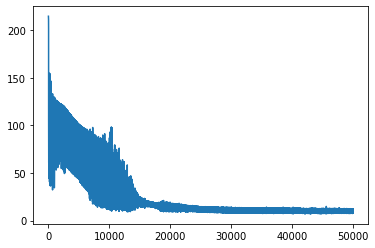

In [77]:
#loss 그래프
print(f"last : {loss_array[-1]}")
plt.plot(loss_array)
plt.show()

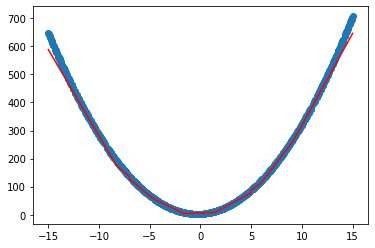

In [78]:
#학습 그래프
plt.scatter(x,y)
x_infer = torch.tensor(np.arange(-15,15,0.01),dtype = torch.float32).reshape(-1,1)
y_infer = model(x_infer).detach().numpy()
x_infer = x_infer.detach().numpy()
plt.plot(x_infer,y_infer,'-r')